## Project Title: Analysis of Bike Sharing Store

### Problem Statement: 
The company, xyz bikes, is a bike rental service, looking to optimize sales and profitability. To understand this, the company needs to gain a deeper understanding of their bike usage and identify opportunities for improvement. 


### Project Objective:
1. Identify seasonal patterns in bike service users. This can help with seasonal marketing campaigns and inventory management.
2. Identify the hourly, daily patterns of registered and casual riders.

### Project Overview:
The goal of this project is to analyze customer behavior to develop actionable insights and strategies that can increase the sales and customer satisfaction.
We aim to address questions such as: 
* What are the key drivers of bike usage?
* Are there seasonal patterns we should be aware of? 

By doing so, we can enhance the decision-making processes, streamline inventory management, and boost overall sales and revenue.


### Table Of Contents:

1. **Importing Libraries and Dataset**
2. **Data Wrangling**
    * Data Cleaning
    * Handling Missing Values
    * Handling Inconsistencies
3. **Analysis**
    * Find the percentage of 'registered' riders
    * Find out whether the pecentage of registered riders increases by month over time.
    * Find out the percentage of riders by month.
    * Find the percentage of casual riders by month
    * Find the percent of riders by season
    * Find the percent of registered riders on a working day
    
4. **Visualizations**
    * Ridge Plot of Temp Distribution and Rider Aggregation
    * Heat map, by only having the features needed for analysis: eliminating the features: total riders, count, mean_month, atemp, registered, casual, year
    * Overall Correlation
    * Scatter plot with both rider types and the correlation
    * Scatter plot with 'registered' riders and temp correlation
    * scatter plot with 'casual' riders and temp correlation
    * Heatmap of the hour and months to see how the registered riders are affected.
    * Heatmap of the hour and months to see how the casual riders are affected.


### Key Performance Indicators (KPIs)
* Calculate the percentage of riders by month, season.
* Calculate the percentage of registered riders by month over time, working day.
* Calculate the percentage of casual riders by month.





### Importing the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [4]:
df = pd.read_csv('/Users/zachariah/Documents/bike_share_data.csv')

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Basic Understanding of the Data

 #### 1. Checking the Dimensions of Dataset

In [6]:
print("Total Number of Records(rows) in the Dataset is: ", df.shape[0])
print("Total Number of Attributes(columns) in the Dataset is: ", df.shape[1])

Total Number of Records(rows) in the Dataset is:  10886
Total Number of Attributes(columns) in the Dataset is:  12


#### 2. Fetching the Attribute Names.

In [8]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Inference

1. datetime: It gives the date and the hour of the rides.
2. season: numeric values 1- Winter, 2- Spring, 3- Summer, 4- Fall
3. holiday: 1 for yes, 0 for No
4. workingday: 1 for yes , 0 for No
5. weather: it is a numerical value either 1, 2 or 3
6. temp: It has the temperatures through the entire year
7. atemp: Temperature values
8. humidity: It hold the values for humidity
9. windspeed: It holds the values of windspeed
10. casual: Number of casual riders
11. registered: Number of registered riders
12. count: Total Number of riders


#### 3. Generating Basic Information of Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Inference

* There are a total of **10886** records and **12** columns in the dataset. Out of the 12 columns, there are 11 numerical columns and 1 date column.


#### 4. Computing Total No.of Missing Values.

In [10]:
df.isnull().sum().to_frame().rename(columns={0:"Total No.of missing values"})

,Total No.of missing values
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


### Inference

* **None** of the columns have missing values
* So, we don't need to perform Data Imputation

#### 5. Checking Duplicate Records

In [11]:
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


### Inference

* There are **no duplicate records** in the dateset.
* So, we can say there is no Data Leakage in the dataset.

### Data Wrangling

* Data Wrangling, also known as Data Munging, refers to the process of cleaning, transforming, and preparing raw data for analysis.
* It involves handling missing values, addressing inconsistencies, and formatting data before it can be used for further analysis.

#### 1. Showing random sample of data

In [13]:
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5168,12/9/2011 10:00,4,0,1,2,12.30,15.150,70,11.0014,11,115,126
4105,10/3/2011 2:00,4,0,1,1,14.76,18.180,76,7.0015,0,4,4
411,1/19/2011 4:00,1,0,1,3,9.02,11.365,93,8.9981,1,1,2
7197,4/18/2012 6:00,2,0,1,2,20.50,24.240,39,19.0012,6,128,134
5530,1/5/2012 13:00,1,0,1,1,13.94,15.150,42,19.9995,6,112,118


#### 2. Create a month, year , month_num, day number, day of week, hour columns from datetime column

In [39]:
df['datetime'] =pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.strftime('%B')
df['year'] = df.datetime.dt.year
df['month_num'] = df['datetime'].dt.month
df['day number'] = df['datetime'].dt.dayofweek
df['day of week'] = df['datetime'].dt.strftime('%A')
df['hour'] = df['datetime'].dt.hour

#### 3. Create a new column 'Total Riders' . Also, make sure there are no negatives in the column

In [37]:
df = df[df['registered'] > 0]

df['total riders'] = df['casual'] + df['registered']

#### 4. Looking at the data after creating the new columns

In [40]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,month_num,day number,day of week,total riders,hour
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,13,16,January,2011,1,5,Saturday,16,0
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,32,40,January,2011,1,5,Saturday,40,1
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,27,32,January,2011,1,5,Saturday,32,2
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,10,13,January,2011,1,5,Saturday,13,3
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,1,1,January,2011,1,5,Saturday,1,4


#### 4. Convert the numerical values for seasons column into words for the seasons, 1: winter, 2: spring, 3: summer, 4: winter. 
        Map the season dictionary to the season numerical column.

In [20]:
seasons_mapping = {1: 'winter',
                   2: 'spring',
                   3: 'summer',
                   4: 'fall'}
df['season'] = df['season'].map(seasons_mapping)

In [21]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,month_num,day number,day of week,total riders
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,13,16,January,2011,1,5,Saturday,16
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,32,40,January,2011,1,5,Saturday,40
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,27,32,January,2011,1,5,Saturday,32
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,10,13,January,2011,1,5,Saturday,13
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,1,1,January,2011,1,5,Saturday,1


### Analysis

#### 1. Find the percentage of  'registered'  riders

In [24]:
round(df['registered'].sum()/df['total riders'].sum(),2) * 100

81.0

### Inference

* The percentage of **registered** riders is **81%**

#### 2. Find out whether the pecentage of registered riders increases by month over time.

In [26]:
df.groupby(['season','month',])['registered'].sum()/df.groupby('month')['total riders'].sum() * 100

season  month    
fall    December     90.821678
        November     85.630809
        October      81.638979
spring  April        76.217130
        June         77.994228
        May          79.372661
summer  August       78.516832
        July         76.261433
        September    78.402477
winter  February     90.619798
        January      90.921837
        March        81.231601
dtype: float64

### Inference

* The percentage of **registered** riders in **Fall** and **winter** months is **above 80%**
* whereas, in the **Spring** and **Summer** months, the percentage of **registered** riders **drops below 80%**

* In the Spring and Summer months, we are getting less registered riders than in the fall and winter months.
* In other words, there are more Casual riders during the spring and summer months.

#### 3. Find out the percentage of riders by month.

In [28]:
df.groupby('month').sum()['total riders']/df['total riders'].sum()*100

month
April         8.027040
August       10.238238
December      7.679781
February      4.752536
January       3.830492
July         10.291032
June         10.584298
March         6.401464
May           9.597185
November      8.460419
October       9.946602
September    10.190911
Name: total riders, dtype: float64

### Inference

* In the winter months, the percentage of total riders is quite **low**, which means that the temparature is NOT allowing the riders to use the bike services.

### Recommendation

* Offer a yearly subsription, instead of single use rides, so that revenue is generated during the months there are not enough riders using the service.

#### 4. Find the percentage of casual riders by month

In [29]:
df.groupby('month').sum()['casual']/df['casual'].sum()*100

month
April        10.152881
August       11.697502
December      3.748709
February      2.370867
January       1.849363
July         12.992209
June         12.387061
March         6.389636
May          10.528262
November      6.465375
October       9.712726
September    11.705408
Name: casual, dtype: float64

### Inference

* During **fall** months going into the **winter**, the percentage to **casual** riders continues to **fall below 10%** with january being the lowest at **1%**
* The **Spring** months sees a **rise** in the **casual** riders going from **10%** to the highest in the **summer** months June and July at around **12%**

#### 5. Find the percent of riders by season

In [31]:
df.groupby(['season']).sum()[['total riders']]/df['total riders'].sum() * 100

,total riders
season,
fall,26.086802
spring,28.208524
summer,30.720181
winter,14.984493


### Inference

* The majority of the riders are in **summer** and **spring**


#### 6. Find the percent of registered riders on a working day

In [35]:
df.groupby('workingday').sum()['registered']/df['registered'].sum() * 100

workingday
0    26.505884
1    73.494116
Name: registered, dtype: float64

### Inference

* **73%** of **Registered** riders are using the bike service as their mode of communication on **working** day and only **26%** of them use the service on **non working** days.

* The **registered** users are using the bike service as primary mode of transportation year around.

### Visualizations

#### 1. Create a mean month and isolate a single year

In [41]:
df = df[df['year']==2011]
df['mean month'] = df['month'].map(df.groupby('month')['total riders'].mean())

#### 2. Find the average total riders by month

In [42]:
df.groupby('month')['total riders'].mean()

month
April        111.507726
August       183.065934
December     134.173246
February      73.797753
January       54.892774
July         203.614035
June         196.877193
March         87.818594
May          174.809211
November     155.458333
October      174.773626
September    176.164811
Name: total riders, dtype: float64

#### Inference

* The most riders are in the month of June and July, which are the summer months. The least riders are in January and February, which are the winter months.

#### 3. Create a month dictionary 

In [43]:
month_dict = []
for i in enumerate(df['month'].unique(),1):
    month_dict.append(i)
month_dict = dict(month_dict)

In [44]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,month_num,day number,day of week,total riders,hour,mean month
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,13,16,January,2011,1,5,Saturday,16,0,54.892774
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,32,40,January,2011,1,5,Saturday,40,1,54.892774
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,27,32,January,2011,1,5,Saturday,32,2,54.892774
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,10,13,January,2011,1,5,Saturday,13,3,54.892774
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,1,1,January,2011,1,5,Saturday,1,4,54.892774


#### 4. Create a Ridge Plot

Text(0.5, 0.98, 'Temp Distribution and Rider Aggregation')

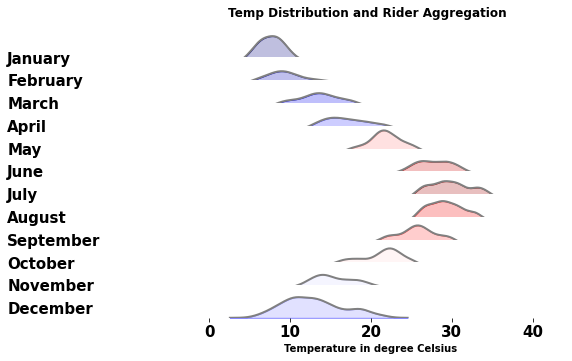

In [46]:
# We generate a color palette with seaborn.color_palette()

pal = sns.color_palette(palette='seismic', n_colors=12,)

# in the sns.FacetGrid class, the 'hue' argument is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df, row='month', aspect=15,height=0.4, hue='mean month',palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'temp',fill=True, lw=1)
# adding a liner graph for the outline
g.map(sns.kdeplot, 'temp',lw=2,color='grey')


#We use the facet grid axes(g.axes.flat) and add the month as text with the right color
for i, ax in enumerate(g.axes.flat):
    ax.text(-25, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15)
    
#Lets adjust the plots so they overlap
g.fig.subplots_adjust(hspace=-0.3)

# Remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.set_xlabels("")
g.set_ylabels("")
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=10)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Temp Distribution and Rider Aggregation',fontweight='bold')

#### 5. Evaluate Correlation

In [47]:
correlations = []
def correlation_matrix(data, col1, col2, col3, col4):
    correlation1_sr = spearmanr(data[col1], data[col2])[0]
    correlation2_sr = spearmanr(data[col3], data[col4])[0]
    correlation3_pr = pearsonr(data[col1], data[col2])[0]
    correlation4_pr = pearsonr(data[col3], data[col4])[0]
    series = pd.Series({'registered(spearmanr)': correlation1_sr,
                       'casual(spearmanr)': correlation2_sr,
                       'registered(pearsonr)': correlation3_pr,
                       'casual(pearsonr)': correlation4_pr})
    return series
correlation_matrix(df, 'registered', 'temp', 'casual', 'temp')
    

registered(spearmanr)    0.391726
casual(spearmanr)        0.608284
registered(pearsonr)     0.369914
casual(pearsonr)         0.498210
dtype: float64

### Inference

* **registered(spearmanr)**: The value **0.391726** is **positive** and indicates a **weak positive** *monotonic relationship* between the number of **registered riders** and **temperature**. As temperature increases, the number of registered riders tends to increase, but the **relationship is not very strong**.



* **casual(spearmanr)**: The value **0.608284** is **positive** and indicates a **moderate to strong positive** *monotonic relationship* between the number of **casual riders** and **temperature**. As temperature increases, the number of casual riders tends to increase, and this **relationship is stronger than the one for registered riders**.



* **registered(pearsonr)**: The value **0.369914** is **positive** and indicates a **weak positive** *linear* relationship between the number of **registered riders** and **temperature**. As temperature increases, the number of registered riders tends to increase, but the relationship is not very strong. It's a similar relationship as the Spearman correlation but specifically measures linear association.



* **casual(pearsonr)**: The value **0.498210** is **positive** and indicates a **moderate positive** *linear relationship* between the number of **casual riders** and **temperature**. As temperature increases, the number of casual riders tends to increase, and this linear relationship is **stronger** than the one for registered riders.


#### 6. Create a correlation plot

<AxesSubplot:>

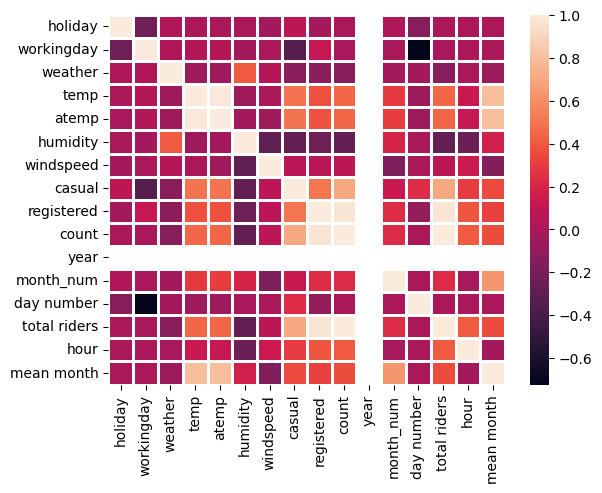

In [48]:
sns.heatmap(df.corr(), linewidths=1)

#### 7. Create the heat map, by only having the features needed for analysis: 
    eliminating the features: total riders, count, mean_month, atemp, registered, casual, year

Isolating the correlation to only the riders:

Text(0.5, 1.0, 'Overall Correlation')

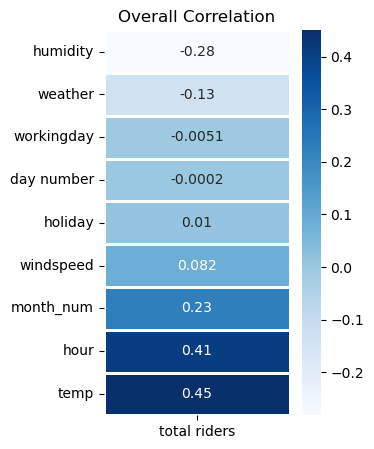

In [52]:

plt.figure(figsize=(3,5))
sns.heatmap(df.corr()[['total riders']].sort_values(by='total riders')\
            .drop(['total riders',
                   'count',
                   'mean month',
                   'atemp',
                   'registered','casual','year']),linewidths=1,annot=True, cmap='Blues')
plt.title('Overall Correlation')

### Inference

* The heatmap is sorted by the strength of the correlation with 'total riders' column. 
* The darker the shade of color and the positive correlation coefficents indicate the strength of relationship between the features and 'total riders'
* So, the factors that are most influential in determining the number of total riders are temp, followed by the hour



Note: By default, the corr() method takes the pearsonr correlation, and we can change it to spearmanr.

#### 8. Create a scatter plot with both rider types and the correlation

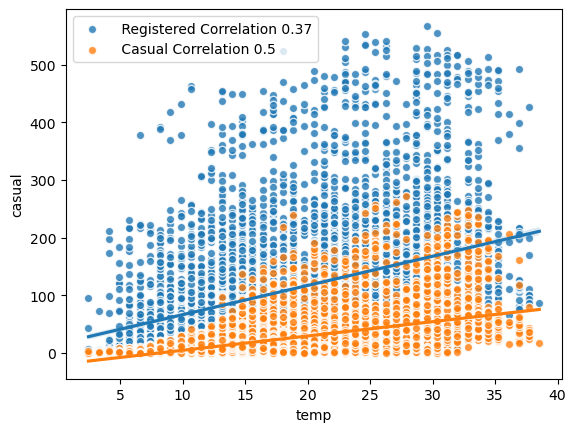

In [53]:
r_corr =round(pearsonr(df['temp'],df['registered'])[0],2)
c_corr = round(pearsonr(df['temp'],df['casual'])[0],2)
sns.regplot(data=df,x='temp',y='registered',scatter_kws={'edgecolor':'white'},label=f' Registered Correlation {r_corr}')
sns.regplot(data=df,x='temp',y='casual',scatter_kws={'edgecolor':'white'},label=f' Casual Correlation {c_corr}')
plt.legend()

### Inference

* The plot is too busy, with having both the casual and registered riders together.
* we will create isolated plots for casual and registered riders.


#### 9. Create a scatter plot with 'registered' riders and temp correlation

Text(0.5, 1.0, 'Registered')

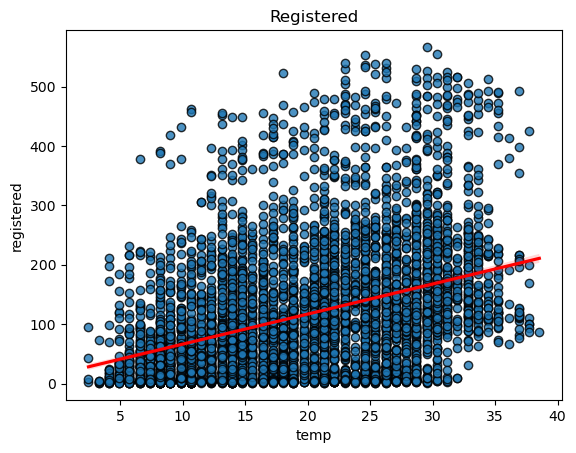

In [54]:
sns.regplot(data=df,x='temp',y='registered',scatter_kws={'edgecolor':'black'},
            label=f' Registered Correlation {r_corr}',
           line_kws={'color':'red'})
plt.title('Registered')

### Inference



#### 10. Create a scatter plot with 'casual' riders and temp correlation

Text(0.5, 1.0, 'Casual')

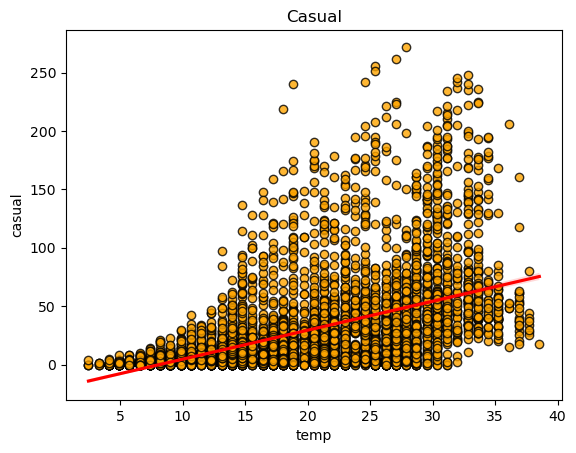

In [56]:
sns.regplot(data=df,x='temp',y='casual',scatter_kws={'edgecolor':'black'},
            label=f' Casual Correlation {c_corr}',color='orange',
           line_kws={'color':'red'})
plt.title('Casual')

### Inference

#### 11. Create a heatmap of the hour and months to see how the registered riders are affected.

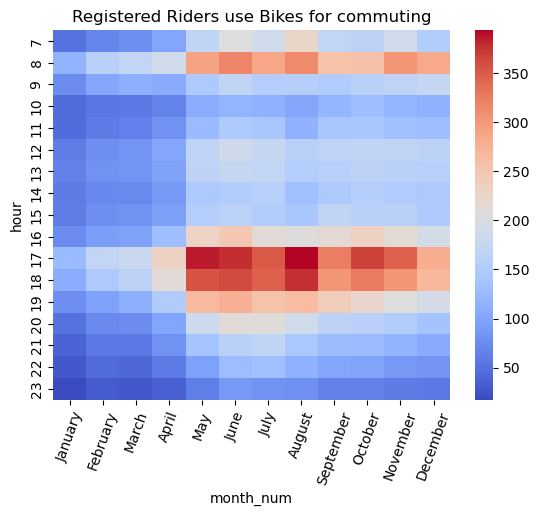

In [68]:
ax =sns.heatmap(pd.pivot_table(data=df[df['hour']>6],
                           index='hour',
                           columns='month_num',
                           values='registered',
                           aggfunc='mean'),cmap='coolwarm')
ax.set_xticklabels(df.month.unique())
plt.xticks(rotation=70)
plt.title('Registered Riders use Bikes for commuting');

### Inference

* The months April, May, June, July, August, September have lot more users. The registered riders are more stable customers throughpout the year.

#### 12. Create a heatmap of the hour and day of the week to see how the casual riders are affected.

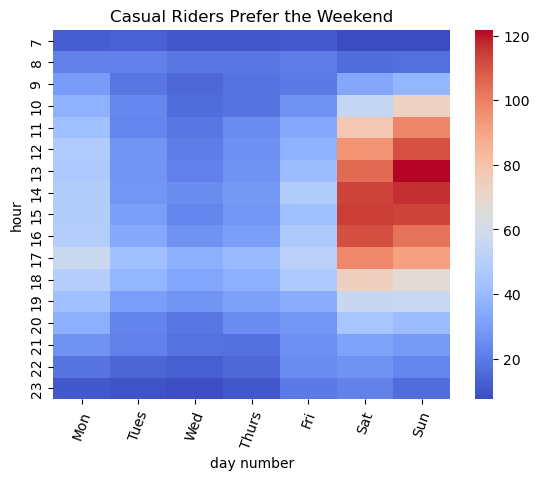

In [59]:
ax =sns.heatmap(pd.pivot_table(data=df[df['hour']>6],
                           index='hour',
                           columns='day number',
                           values='casual',
                           aggfunc='mean'),cmap='coolwarm')
ax.set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.xticks(rotation=70)
plt.title('Casual Riders Prefer the Weekend');

### Inference

* The casual riders are more during the weekends: Saturday and Sunday.

#### 13. Find the percentage of 'casual riders' by 'day of week' feature

In [61]:
df.groupby('day of week').sum()['casual']/df['casual'].sum() * 100

day of week
Friday       12.289463
Monday       13.503903
Saturday     24.628351
Sunday       24.205351
Thursday      8.611482
Tuesday       9.327822
Wednesday     7.433629
Name: casual, dtype: float64

### Inference

* Basically, this validates the heat map, in that the percentage of casual riders is about **50%** on **Saturday** and **Sunday**

#### 14. Create a KDE plot to see the distribution of casual riders and registered riders

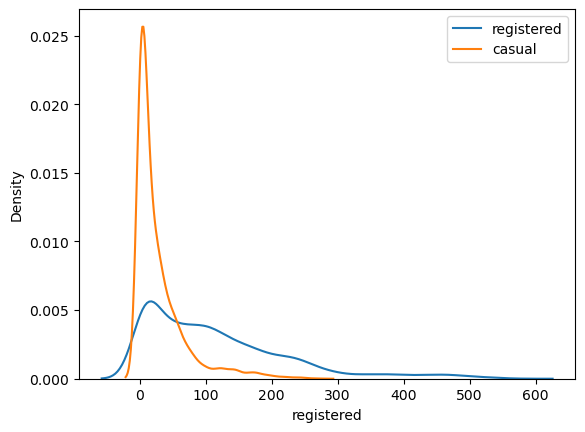

In [62]:
sns.kdeplot(df['registered'],label='registered')
sns.kdeplot(df['casual'],label='casual')
plt.legend()

### Inference

* Most of the Casual riders are around 100 and below.

#### 15. Understand what temperatures had the most riders out and about.

Create temparature buckets.

In [63]:
df['Temp Buckets'] = pd.qcut(df['temp'],4)

In [64]:
df['Temp Buckets'].value_counts()

(19.68, 26.24]    1409
(2.459, 13.12]    1387
(13.12, 19.68]    1341
(26.24, 38.54]    1270
Name: Temp Buckets, dtype: int64

In [65]:
grouping = df.groupby('Temp Buckets').mean()[['casual','registered','total riders']]
grouping['Difference'] =  grouping['registered']/grouping['casual']
grouping

,casual,registered,total riders,Difference
Temp Buckets,,,,
"(2.459, 13.12]",5.594088,66.532805,72.126893,11.893414
"(13.12, 19.68]",20.045488,98.758389,118.803878,4.926714
"(19.68, 26.24]",32.829666,130.836054,163.665720,3.985300
"(26.24, 38.54]",58.972441,170.943307,229.915748,2.898698


### Inference

* There are very few **casual** riders when the temperatures are **below 13 degrees**, but **66%** of **registered riders** are still **using the bike service.**
* The Total riders when temperatures are below 13 degrees, is 72, the difference shows that the registered riders(66.53) are 11 times more than casual riders(5.59). 
* So, the registered riders are using the bike service a lot more in than casual riders during the winter months.

* when it is under 20 degrees, the difference is only about 5 times.
* In the fall months, the difference is about 4 times and summer months, it is even less, to about 3 times.
* The **Casual** riders are very much affected by the **temparature** change.

#### 16. Plot the exponential change in Rides by Temparature groups.

<AxesSubplot:title={'center':'Exponential Change in Riders By Temp Group'}, xlabel='Temp Buckets', ylabel='Difference'>

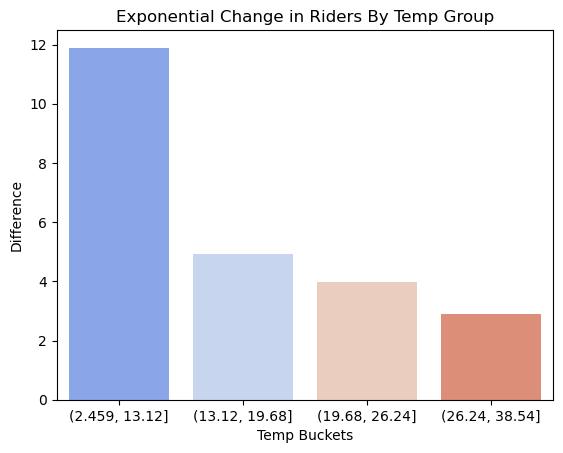

In [66]:
plt.title('Exponential Change in Riders By Temp Group')
sns.barplot(data = grouping, x=grouping.index, y='Difference',palette='coolwarm')

### Inference

* The registered riders are 12 times the casual riders during the winter months.
* The registered riders are about 5 times the casual riders during the fall months.
* whereas, the difference between registered and casual riders becomes smaller as the tempeartures rise from spring going into summer.

### Conclusion

* Riders are affected by the Temparatures. As the temperature drops, the riders using the bike rental service decrease.

    * Only 12% Total Riders occur in winter months( 10% registered riders and 2% casual riders)
    * Upto 90% of riders in the winter months are registered.

* Registered riders use bikes as an alternate mode of transportation

    * Most casual riders are using the bikes during off peak hours, highest usage is during the weekends(Saturday and Sunday), and during the spring and summer months.
    
* Working Hours have the highest density of riders.

    * Registered riders use the bikes during the working hours and days throughout the year.
   
* There exists a correlation between temparature and increased riders
    
    * Temparature is positively correlated with temparature.
    
    

### Recommendations

* Offer a subscription model to help offset the drop in bike rentals during the winter months. This will help keep the revenue stable during the lean winter and fall months.